In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [2]:
df=pandas.get_dummies(datas, columns=['sex'])
man = (df["sex_F"] <= 0).sum()
women=(df["sex_M"] <= 0).sum()
print(man/women)

0.7857142857142857


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
man = (test["sex_F"] <= 0).sum()
women=(train["sex_M"] <= 0).sum()
print(man/women)


0.7857142857142857


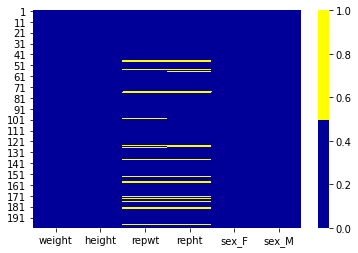

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


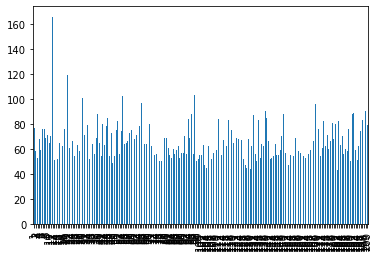

In [6]:
df['weight'].plot.bar()

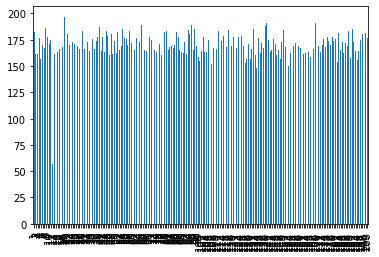

In [7]:
df['height'].plot.bar()


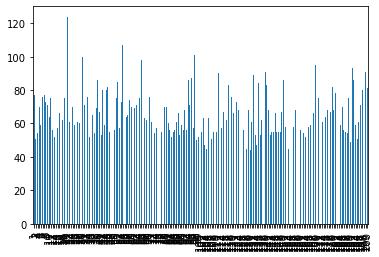

In [8]:
df['repwt'].plot.bar()

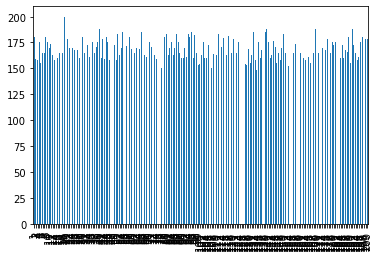

In [9]:
df['repht'].plot.bar()

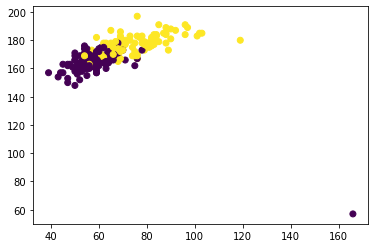

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

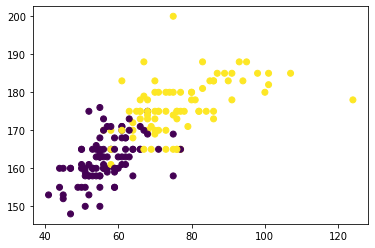

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

In [12]:
df = df.drop_duplicates()
df

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


In [13]:
from scipy import stats
import numpy as np
train=train.dropna(axis=0)
train_df=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
train_df

,weight,height,repwt,repht,sex_F,sex_M
72,66,173,66.0,175.0,0,1
189,76,183,75.0,180.0,0,1
67,64,165,63.0,163.0,1,0
54,102,185,107.0,185.0,0,1
51,82,182,85.0,183.0,0,1
...,...,...,...,...,...,...
71,62,175,61.0,171.0,1,0
102,63,178,63.0,175.0,0,1
95,88,189,87.0,185.0,0,1
32,75,178,73.0,175.0,0,1


In [14]:
test=test.dropna(axis=0)
test_df=test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]
test_df

,weight,height,repwt,repht,sex_F,sex_M
145,64,171,66.0,171.0,1,0
20,61,175,61.0,171.0,1,0
59,75,172,70.0,169.0,0,1
78,63,160,64.0,158.0,1,0
108,57,167,55.0,164.0,1,0
...,...,...,...,...,...,...
128,45,157,45.0,153.0,1,0
85,56,170,56.0,170.0,1,0
63,71,180,76.0,175.0,0,1
88,53,165,53.0,165.0,1,0


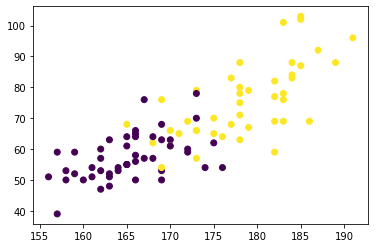

In [15]:
plt.scatter(train_df['height'], train_df['weight'], c= train_df['sex_M'])

# Гистограммы 

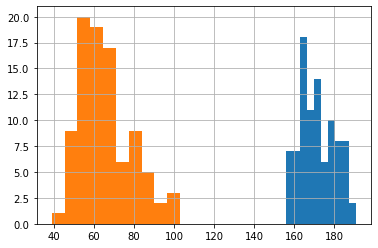

In [16]:
train_df['height'].hist()
train_df["weight"].hist()

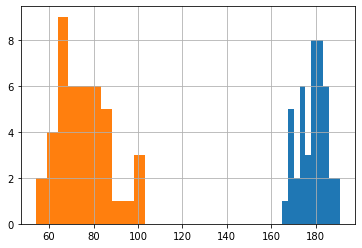

In [17]:
train_df_man= train_df.loc[train_df['sex_M'] ==1]
train_df_man['height'].hist()
train_df_man["weight"].hist()

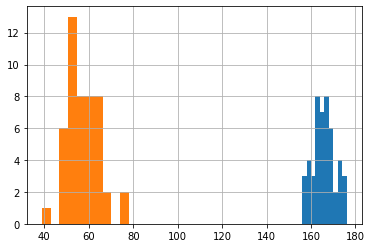

In [18]:
train_df_woman= train_df.loc[train_df['sex_M'] !=1]
train_df_woman['height'].hist()
train_df_woman["weight"].hist()

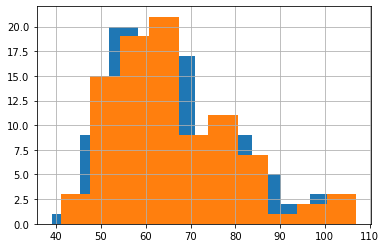

In [19]:
train_df["weight"].hist()
train_df['repwt'].hist()

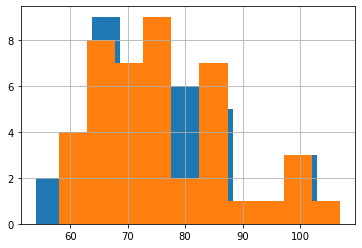

In [20]:
train_df_man["weight"].hist()
train_df_man['repwt'].hist()

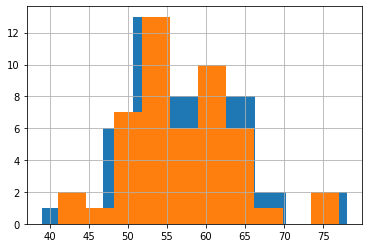

In [21]:
train_df_woman["weight"].hist()
train_df_woman['repwt'].hist()

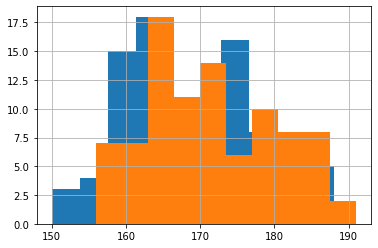

In [22]:
train_df['repht'].hist()
train_df["height"].hist()

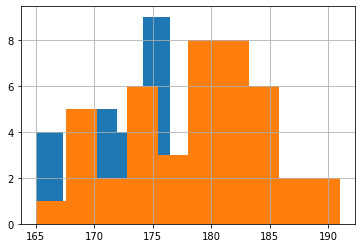

In [23]:
train_df_man['repht'].hist()
train_df_man["height"].hist()

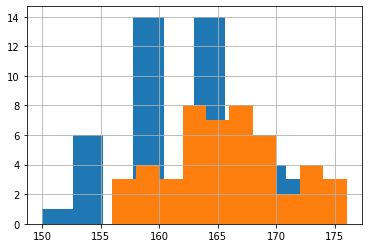

In [24]:
train_df_woman['repht'].hist()
train_df_woman["height"].hist()

In [25]:
ratio_man= man/(man+women)
print(ratio_man)
ratio_woman= 1- ratio_man
print(ratio_woman)

0.44
0.56


In [26]:
a=[0,1]
sex_W_arr=np.random.choice(a,100, p=[ratio_man, ratio_woman])
sex_M_arr=np.abs(sex_W_arr-1)
print(sex_W_arr)
print("___________________________________________________________________________")
print(sex_M_arr)

[1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0]
___________________________________________________________________________
[0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1]


In [27]:
for_generation_woman=train_df_woman.drop(['repwt', 'repht','sex_M'], axis='columns')
for_generation_woman

#for_generation_man=train_df_man.drop(['repwt', 'repht'], axis='columns')
#for_generation_man=train_df_man

,weight,height,sex_F
67,64,165,1
162,54,161,1
37,56,166,1
49,54,174,1
167,63,170,1
27,63,169,1
43,63,163,1
5,59,157,1
115,76,167,1
66,60,162,1


In [28]:
std_h_w=for_generation_woman.drop(['weight','sex_F'], axis='columns').std().values.astype(np.float)
mean_h_w=for_generation_woman.drop(['weight','sex_F'], axis='columns').mean().values.astype(np.float)
print(std_h_w[0], 
      mean_h_w[0])
D_h_w=std_h_w[0]*std_h_w[0]


4.965126611628705 165.33333333333334


In [29]:
std_w_w=for_generation_woman.drop(['height','sex_F'], axis='columns').std().values.astype(np.float)
mean_w_w=for_generation_woman.drop(['height','sex_F'], axis='columns').mean().values.astype(np.float)
print(std_w_w[0], mean_w_w[0])
D_w_w=std_w_w[0]*std_w_w[0]

7.358957488608623 57.375


In [30]:
pre_cov=(for_generation_woman['height']-mean_h_w)*(for_generation_woman['weight']-mean_w_w)
cov_w= np.mean(pre_cov)

In [31]:
X_woman= np.random.multivariate_normal([mean_h_w[0], mean_w_w[0]], [[D_h_w, cov_w],[cov_w,D_w_w]],size=100)

In [32]:
X_woman

array([[157.15570363,  49.47425252],
       [174.16856408,  60.75188599],
       [157.06951534,  70.70224772],
       [163.34251005,  57.15449914],
       [164.40615941,  56.34029071],
       [165.18681652,  52.41889758],
       [168.32463436,  60.46407636],
       [165.12800381,  61.61904351],
       [162.2088274 ,  66.9149758 ],
       [169.66348404,  65.5766498 ],
       [155.98261322,  46.67839694],
       [165.9741616 ,  54.67665775],
       [169.30059313,  56.25621887],
       [159.12062949,  52.69813792],
       [171.35401291,  62.13202354],
       [159.42404754,  50.53107339],
       [164.87822856,  48.17649816],
       [162.94153826,  47.76314063],
       [160.51483161,  50.24883589],
       [155.85295408,  51.32643353],
       [162.11586712,  71.20486987],
       [164.94611016,  57.97689015],
       [169.9885326 ,  70.01616407],
       [163.65081019,  49.92988212],
       [160.28239443,  52.79162356],
       [157.67126863,  53.9955081 ],
       [162.31881871,  56.55915199],
 

In [33]:
for_generation_man=train_df_man
std_h=for_generation_man.drop(['weight','sex_M'], axis='columns').std().values.astype(np.float)
mean_h=for_generation_man.drop(['weight','sex_M'], axis='columns').mean().values.astype(np.float)
print(std_h[0], 
      mean_h[0])
D_h=std_h[0]*std_h[0]
std_w=for_generation_man.drop(['height','sex_M'], axis='columns').std().values.astype(np.float)
mean_w=for_generation_man.drop(['height','sex_M'], axis='columns').mean().values.astype(np.float)
print(std_w[0], mean_w[0])
D_w=std_w[0]*std_w[0]
pre_cov=(for_generation_man['height']-mean_h[0])*(for_generation_man['weight']- mean_w[0])
cov= np.mean(pre_cov)
X_man= np.random.multivariate_normal([mean_h[0], mean_w[0]], [[D_h, cov],[cov,D_w]],size=100)

6.203810496244319 178.41860465116278
12.288656321873464 75.4186046511628


In [34]:
X_man

array([[168.0290616 ,  65.81477185],
       [179.21594908,  77.68582779],
       [177.41388331,  74.67477604],
       [183.90665666,  70.71083489],
       [179.56076099,  65.07780902],
       [185.02922141,  82.51353231],
       [172.83664427,  85.61108208],
       [184.0505141 ,  81.81257445],
       [175.64038068,  69.8783391 ],
       [180.16771495,  83.60663604],
       [179.15625307,  69.57144289],
       [169.49058011,  50.69359412],
       [189.94455494,  79.18115052],
       [176.42920554,  68.30256745],
       [178.09639612,  83.97490848],
       [172.86549009,  63.07266892],
       [181.774085  ,  82.30990919],
       [174.91334603,  79.0891511 ],
       [174.25109325,  61.76336913],
       [174.22696197,  55.45758828],
       [169.37382571,  60.46603789],
       [175.28389086,  43.23455258],
       [181.02320292,  86.28096469],
       [178.30195176,  77.29000469],
       [169.95518779,  64.09237301],
       [185.47608856,  86.91901859],
       [184.80577359,  81.15637803],
 

In [35]:
data={}
heights_all=[]
weights_all=[]


for i in range(100):
    if sex_W_arr[i]==1:
        need= X_woman[i]
    else:
         need= X_man[i]
    heights_all.append(need[0])
    weights_all.append(need[1])    
    
data['height']=heights_all
data['weight']=weights_all   
data["sex_F"]=sex_W_arr
data["sex_M"]=sex_M_arr  
generated_df=pandas.DataFrame(data)


In [36]:
generated_df

,height,weight,sex_F,sex_M
0,157.155704,49.474253,1,0
1,179.215949,77.685828,0,1
2,177.413883,74.674776,0,1
3,163.342510,57.154499,1,0
4,164.406159,56.340291,1,0
...,...,...,...,...
95,178.285569,69.809064,0,1
96,181.172516,78.938576,0,1
97,171.459243,55.910023,1,0
98,183.625633,88.281034,0,1


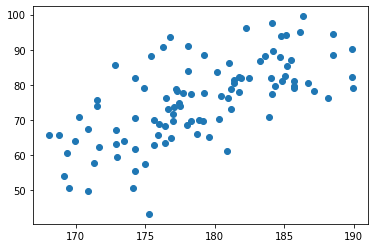

In [37]:
scat_h=[]
scat_w=[]
for i in range(len(X_man)):
    n=X_man[i]
    scat_h.append(n[0])
    scat_w.append(n[1])

plt.scatter(scat_h,scat_w)

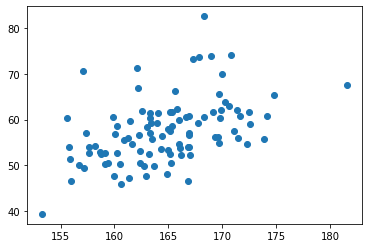

In [38]:
scat_h=[]
scat_w=[]
for i in range(len(X_woman)):
    n=X_woman[i]
    scat_h.append(n[0])
    scat_w.append(n[1])

plt.scatter(scat_h,scat_w)

(100,)


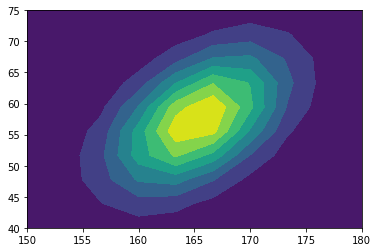

In [39]:
import scipy.stats
ww,bb = np.mgrid[150:180:10j, 40:75:10j]
matrix = np.column_stack((ww.ravel(), bb.ravel()))
pdf = scipy.stats.multivariate_normal.pdf(matrix,mean=[mean_h_w[0], mean_w_w[0]],cov=[[D_h_w, cov_w],[cov_w,D_w_w]])
print(pdf.shape)
plt.contourf(ww, bb, pdf.reshape(ww.shape))

(100,)


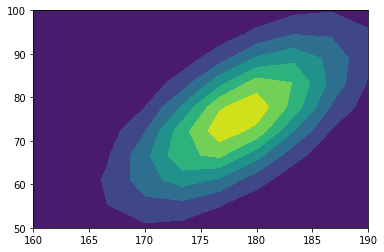

In [40]:

xm,ym = np.mgrid[160:190:10j, 50:100:10j]
matrix_m = np.column_stack((xm.ravel(), ym.ravel()))
pdf = scipy.stats.multivariate_normal.pdf(matrix_m,mean=[mean_h[0], mean_w[0]],cov=[[D_h, cov],[cov,D_w]])
print(pdf.shape)
plt.contourf(xm, ym, pdf.reshape(xm.shape))

# Задание 2


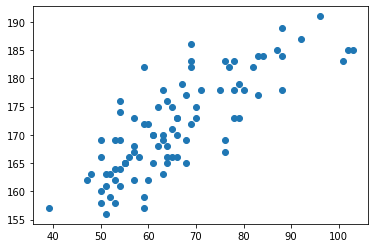

In [41]:
from sklearn.linear_model import LinearRegression
plt.scatter(train_df['weight'], train_df["height"])

In [42]:
lreg=LinearRegression()
reg_h_train=train_df[["height"]].values.astype(np.float)

reg_w_train=train_df['weight'].values.astype(np.float)
print(reg_h_train, reg_w_train )
lreg.fit(reg_h_train, reg_w_train)

[[173.]
 [183.]
 [165.]
 [185.]
 [182.]
 [183.]
 [161.]
 [172.]
 [166.]
 [171.]
 [174.]
 [170.]
 [169.]
 [163.]
 [157.]
 [167.]
 [177.]
 [168.]
 [178.]
 [162.]
 [175.]
 [184.]
 [156.]
 [172.]
 [173.]
 [169.]
 [178.]
 [165.]
 [182.]
 [170.]
 [175.]
 [166.]
 [159.]
 [165.]
 [191.]
 [184.]
 [185.]
 [169.]
 [170.]
 [165.]
 [176.]
 [187.]
 [164.]
 [182.]
 [163.]
 [168.]
 [178.]
 [162.]
 [173.]
 [165.]
 [173.]
 [160.]
 [166.]
 [170.]
 [177.]
 [158.]
 [162.]
 [183.]
 [166.]
 [186.]
 [172.]
 [176.]
 [158.]
 [185.]
 [166.]
 [169.]
 [182.]
 [183.]
 [168.]
 [178.]
 [173.]
 [161.]
 [164.]
 [184.]
 [169.]
 [159.]
 [173.]
 [179.]
 [157.]
 [163.]
 [162.]
 [165.]
 [167.]
 [169.]
 [179.]
 [166.]
 [175.]
 [178.]
 [189.]
 [178.]
 [163.]] [ 66.  76.  64. 102.  82.  69.  54.  69.  56.  65.  54.  63.  63.  63.
  59.  76.  83.  62.  88.  60.  70.  84.  51.  60.  79.  68.  80.  55.
  77.  61.  65.  65.  52.  55.  96.  88. 103.  50.  61.  68.  64.  92.
  54.  59.  51.  64.  71.  57.  78.  55.  66.  50.  58.  6

LinearRegression()

In [43]:
lreg_pred=lreg.predict(test_df[["height"]])

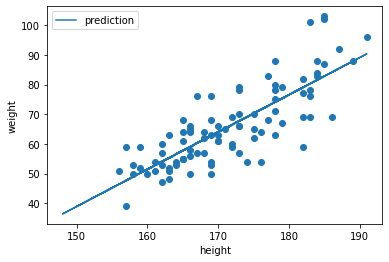

In [44]:
plt.scatter(train_df["height"], train_df['weight'])
plt.plot(test_df["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_df['weight'], lreg_pred)

62.82862348211365

In [46]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)
    

In [47]:
errs=get_error(test_df['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))
ww,bb = np.mgrid[0:2:200j, -200:200:200j]


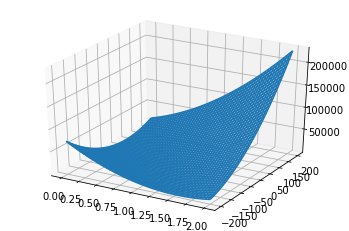

In [48]:
err = []
h_ = train_df['height'].values.astype(np.float)
w_ = train_df['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, err.reshape(ww.shape))

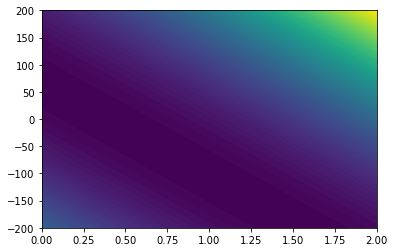

In [49]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)


In [50]:
new_train_df=train_df.drop(["sex_F"], axis=1)
new_train_df=new_train_df.drop(["repwt"], axis=1)
new_train_df=new_train_df.drop(["repht"], axis=1)
new_train_df

,weight,height,sex_M
72,66,173,1
189,76,183,1
67,64,165,0
54,102,185,1
51,82,182,1
...,...,...,...
71,62,175,0
102,63,178,1
95,88,189,1
32,75,178,1


In [51]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [52]:
new_test_df=test_df.drop(["sex_F"], axis=1)
new_test_df=new_test_df.drop(["repwt"], axis=1)
new_test_df=new_test_df.drop(["repht"], axis=1)
new_test_df

,weight,height,sex_M
145,64,171,0
20,61,175,0
59,75,172,1
78,63,160,0
108,57,167,0
...,...,...,...
128,45,157,0
85,56,170,0
63,71,180,1
88,53,165,0


In [53]:
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

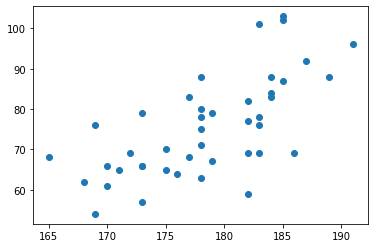

In [54]:
train_df_man = new_train_df.loc[new_train_df['sex_M'] ==1]
test_df_man = new_test_df.loc[new_test_df['sex_M'] ==1]
plt.scatter(train_df_man["height"], train_df_man['weight'])


In [55]:
mean_squared_error(new_test_df['weight'], lr_pred_new)

55.101280107685426

# Градиентным спуском

In [56]:
gr_train_df=train_df.drop(["sex_F","sex_M","repwt","repht"], axis='columns')

In [57]:
gr_train_df.mean()

weight     65.901099
height    171.516484
dtype: float64

In [58]:
gr_train_df.std()

weight    13.446234
height     8.601502
dtype: float64

In [59]:
gr_train_df_scale = (gr_train_df - gr_train_df.mean()) / gr_train_df.std()

In [60]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(gr_train_df_scale['height'].values) * np.sum((gr_train_df_scale['weight'].values - w * gr_train_df_scale['height'].values - b)**2))
L = np.array(L)

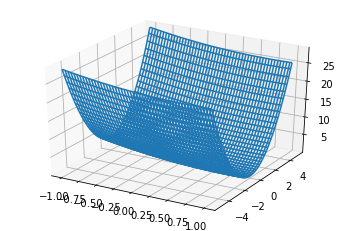

In [61]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

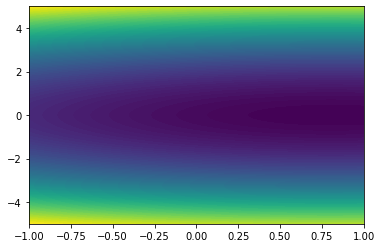

In [62]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

In [63]:
w = 1
b = 1
alpha = 0.002

x = gr_train_df_scale['height'].values
y = gr_train_df_scale['weight'].values
N = len(x)
E = 2



for i in range(9300):
    min_ = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    norm = np.sqrt(d_w**2 + d_b**2)
    
    if norm > E:
        small_n = norm / E
        d_w = d_w/ small_n
        d_b = d_b / small_n
    w = w - alpha * d_w
    b = b - alpha * d_b
print("w= {} , b = {}".format(w,b))
print("min = {}".format( min_))

w= 0.8027173918617352 , b = 8.204155739893834e-09
min = 0.3517366074643535


In [64]:
gr_lr = LinearRegression().fit(gr_train_df_scale['height'].values.reshape(-1,1),gr_train_df_scale['weight'].values)
gr_lr.coef_

array([0.80271739])